### Import Libraries

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

### Load data

In [21]:
# Read the dataset
df = pd.read_csv('emotions.csv')
df.head()

,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness


In [22]:
df.info

<bound method DataFrame.info of                                                     text    label
0      i feel so pissed off over an old friend and so...    anger
1      ive found it has made a huge difference especi...    anger
2      i also feel it is unfortunate that nearly all ...  sadness
3                       i feel petty a href http clairee    anger
4      i used to believe that a feeling like fear was...  sadness
...                                                  ...      ...
19995  i was i might be buying stuff from there but i...      joy
19996  i like sonam deepika and genelia who i feel ar...      joy
19997  i feel pathetic that i can hardly go a whole d...  sadness
19998  id have spent more time with her on reading i ...  sadness
19999  i do however feel like one of those pathetic g...  sadness

[20000 rows x 2 columns]>

In [23]:
# unique labels
labels_name= df['label'].unique()
labels_name

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

In [24]:
# Number of classes
num_of_classes = len(labels_name)
print('Total count of the unique labels are ',num_of_classes)

Total count of the unique labels are  6


### Preprocessing

In [25]:
# Tokenization
max_words = 20000
tokenizer = Tokenizer(num_words=max_words,oov_token="<OOV>")

# fit the tokenizer on text data to build vocabulary
tokenizer.fit_on_texts(df['text'])

# Convert text to sequnces of integers
X = tokenizer.texts_to_sequences(df['text'])
print(X[0])

[2, 3, 15, 514, 162, 116, 77, 275, 278, 4, 69, 179]


In [26]:
# Padding the sequences to uniform lengths
maxlen=100
X = pad_sequences(X, padding='post', maxlen=maxlen)
print('Pad sequnce')
print(X)

vocab_size = len(tokenizer.word_index) + 1 # adding 1 for token padding (i.e. index zero)
print('Vocabulary size',vocab_size)


Pad sequnce
[[  2   3  15 ...   0   0   0]
 [ 74 323  13 ...   0   0   0]
 [  2 117   3 ...   0   0   0]
 ...
 [  2   3 580 ...   0   0   0]
 [248  20 405 ...   0   0   0]
 [  2  39 599 ...   0   0   0]]
Vocabulary size 17098


In [27]:
list(tokenizer.word_index.items())[:20]

[('<OOV>', 1),
 ('i', 2),
 ('feel', 3),
 ('and', 4),
 ('to', 5),
 ('the', 6),
 ('a', 7),
 ('feeling', 8),
 ('that', 9),
 ('of', 10),
 ('my', 11),
 ('in', 12),
 ('it', 13),
 ('like', 14),
 ('so', 15),
 ('im', 16),
 ('for', 17),
 ('me', 18),
 ('was', 19),
 ('have', 20)]

In [28]:
# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
print(y)

#One-Hot Encode the labels
y = to_categorical(y)
print(y)

[0 0 4 ... 4 4 4]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [29]:
#train,test-split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of the training data: {x_train.shape},{y_train.shape}')
print(f'Shape of the test data: {x_test.shape},{y_test.shape}')
print(f'Shape of the test data: {x_val.shape},{y_val.shape}')


Shape of the training data: (12800, 100),(12800, 6)
Shape of the test data: (4000, 100),(4000, 6)
Shape of the test data: (3200, 100),(3200, 6)


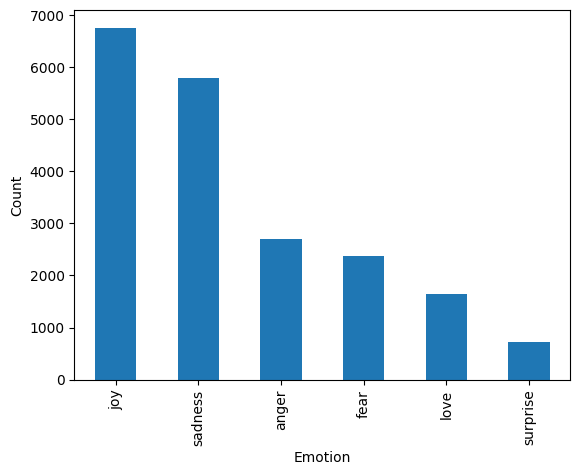

In [31]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


### Create model

In [32]:
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(128, activation='tanh', kernel_regularizer=l2(0.01))),
    Dropout(0.2), 
    Dense(num_of_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


### Train the model

In [33]:


history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val)) 

Epoch 1/10
400/400 [==============================] - 94s 221ms/step - loss: 6.0414 - accuracy: 0.3903 - val_loss: 9.1372 - val_accuracy: 0.5081
Epoch 2/10
400/400 [==============================] - 82s 204ms/step - loss: 8.1658 - accuracy: 0.5780 - val_loss: 7.3599 - val_accuracy: 0.6241
Epoch 3/10
400/400 [==============================] - 80s 200ms/step - loss: 6.5877 - accuracy: 0.6934 - val_loss: 6.0150 - val_accuracy: 0.7072
Epoch 4/10
400/400 [==============================] - 85s 213ms/step - loss: 5.4015 - accuracy: 0.7752 - val_loss: 4.9486 - val_accuracy: 0.8062
Epoch 5/10
400/400 [==============================] - 82s 205ms/step - loss: 4.4029 - accuracy: 0.8655 - val_loss: 4.0811 - val_accuracy: 0.8653
Epoch 6/10
400/400 [==============================] - 82s 206ms/step - loss: 4.0219 - accuracy: 0.8775 - val_loss: 3.5360 - val_accuracy: 0.8506
Epoch 7/10
400/400 [==============================] - 81s 203ms/step - loss: 2.9953 - accuracy: 0.9166 - val_loss: 2.8603 - val_ac

### Visualize the model performance

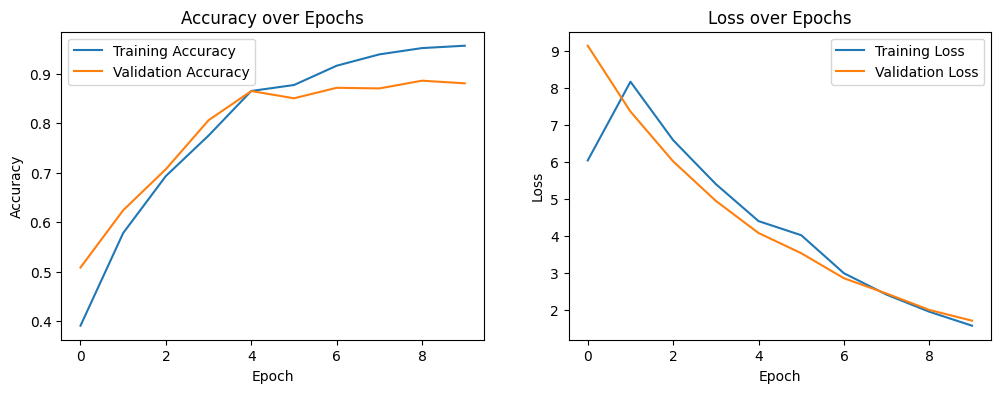

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Evaluate on the test set

In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

125/125 - 7s - loss: 1.6531 - accuracy: 0.8942 - 7s/epoch - 53ms/step
Test Loss: 1.6531
Test Accuracy: 0.8942


In [36]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

125/125 [==============================] - 9s 58ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       530
           1       0.89      0.84      0.86       496
           2       0.92      0.93      0.92      1369
           3       0.81      0.78      0.79       326
           4       0.93      0.92      0.92      1149
           5       0.76      0.71      0.73       130

    accuracy                           0.89      4000
   macro avg       0.86      0.85      0.85      4000
weighted avg       0.89      0.89      0.89      4000

